# Spatial Working Memory (Compte et. al.)

- Read the introduction of chapter [18, Cortical field models for perceptions](http://neuronaldynamics.epfl.ch/online/Ch18.html) and the chapters [18.1](http://neuronaldynamics.epfl.ch/online/Ch18.S1.html), [18.2](http://neuronaldynamics.epfl.ch/online/Ch18.S2.html) and [18.3](http://neuronaldynamics.epfl.ch/online/Ch18.S3.html) . Figure [18.4](http://neuronaldynamics.epfl.ch/online/Ch18.S1.html) in chapter 18.1 shows the kind of ring model we are studying here. If you have access to a scientific library, you may also want to read the original publication [1].


- The exercise is adapted from [here](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html).

In this exercise we study a model of spatial working memory. The model has been introduced by Compte et. al. [1]. The parameters used here differ from the original paper. They are changed such that we can still study some effects while simulating a small network.

<img src=https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/WorkingMemory_Demo.png width="500">
<i><center><b>Top:</b> A weak stimulus, centered at 120deg, is applied to a subset of the excitatory population from t=200ms to t=400ms (blue box in top panel). This creates an activity bump in the excitatory subpopulation. The activity sustains after the end of the stimulation. The active neurons have a preferred direction close to the stimulus location. <b>Middle:</b> The population activity increases over time when the stimulus is applied. <b>Bottom:</b> Voltage traces for three selected neurons. The spikes of the red neuron are visible in the top and bottom panel.</center></i>

Figure [18.4](http://neuronaldynamics.epfl.ch/online/Ch18.S1.html) in chapter 18.1 shows the kind of ring model we are studying here.

**References**

[1] Compte, A., Brunel, N., Goldman-Rakic, P. S., & Wang, X. J. (2000). Synaptic mechanisms and network dynamics underlying spatial working memory in a cortical network model. Cerebral Cortex, 10(9), 910-923.

[2] Parts of this exercise and parts of the implementation are inspired by material from *Stanford University, BIOE 332: Large-Scale Neural Modeling, Kwabena Boahen & Tatiana Engel, 2013*, online available.


**Python classes**

The module `working_memory_network.wm_model` implements a working memory circuit adapted from [1, 2]. To get started, call the function `working_memory_network.wm_model.getting_started` or copy the following code into a Jupyter notebook.

```Python
%matplotlib inline
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2

wm_model.getting_started()
```

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2

## Exercise 1 - Spontanous Bump Formation

We study the structure and activity of the following network.
<img src=https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/WorkingMemory_NetworkStructure.png width="500">
<i><center>Network structure. Look at Figure 18.4 in chapter 18.1 to see how the excitatory population is spatially arranged on a ring and has a specific connectivity profile. In our implementation, every excitatory neuron receives unstructured input from all inhibitory neurons and structured input from all excitatory neurons. The inhibitory neurons receive unstructured input from all excitatory and all inhibitory neurons.</center></i>

**External poisson population.**

Parameters that are not explicitly specified are set to default values. Read the documentation of the function `working_memory_network.wm_model.simulate_wm` to answer the following questions:

1.   By default, how many neurons are in the external poisson population?
2.   Using the default parameters, what is the average number of spikes/second an excitatory neuron receives from the external population?

From the documentation, follow the 'source' link to go to the implementation of `simulate_wm`. Answer the following questions about the external poisson population:

3.   We use the [Brian2 PoissonInput](http://brian2.readthedocs.io/en/stable/user/input.html) to implement the external population. Which post-synaptic variable is targeted by a presynaptic (poisson) spike?
4.   The dynamics of that variable are defined in the equations `excit_lif_dynamics` (still in the source code of simulate\_wm). What is the time-scale of that variable (in milliseconds)?

In [5]:
help(wm_model.simulate_wm)
## Question 1: 1000 neurons
## Question 2: 1.4 Hz

## Question 3: 
##Question 4:

Help on function simulate_wm in module neurodynex.working_memory_network.wm_model:

simulate_wm(N_excitatory=1024, N_inhibitory=256, N_extern_poisson=1000, poisson_firing_rate=1.4 * hertz, weight_scaling_factor=2.0, sigma_weight_profile=20.0, Jpos_excit2excit=1.6, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=70. * pamp, t_stimulus_start=0. * second, t_stimulus_duration=0. * second, distractor_center_deg=90, distractor_width_deg=40, distractor_strength=0. * amp, t_distractor_start=0. * second, t_distractor_duration=0. * second, G_inhib2inhib=0.3584 * nsiemens, G_inhib2excit=0.4676 * nsiemens, G_excit2excit=133.35 * psiemens, G_excit2inhib=122.64 * psiemens, monitored_subset_size=1024, sim_time=0.8 * second)
    Args:
        N_excitatory (int): Size of the excitatory population
        N_inhibitory (int): Size of the inhibitory population
        weight_scaling_factor (float): weight prefactor. When increasing the size of the populations,
            the synaptic we

**Unstructured input.**

5. Run the following code to simulate a network that receives unstructured poisson input.

```Python
%matplotlib inline
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2

rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)
```

6. Without coding, from the plot: What is the population activity (mean firing rate) of the excitatory population at different points in time?
7. Change the firing rate of the external population to 2.2Hz. What do you observe?
8. Run the simulation a few times with r\_ext = 2.2 Hz. Describe your observations.

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c745f30898>)

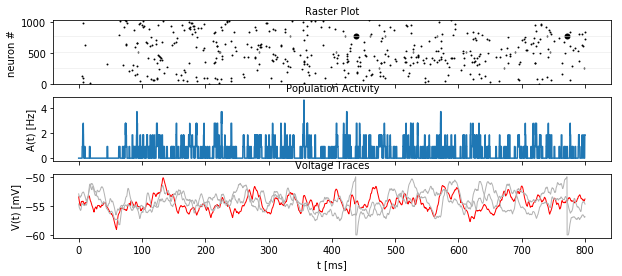

In [7]:
## Question 5:
%matplotlib inline
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2

rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)

##Question 6: we read the population activity on the second graph. Since it is a random simulation,
#the values can vary when the cell is runned several times:
#A(345 ms)=4.5 Hz; A(520 ms)=2 Hz

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c74cb4e668>)

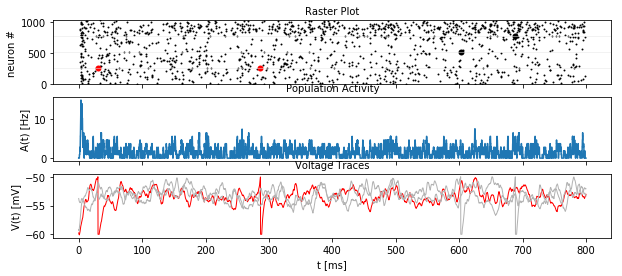

In [12]:
## Question 7:
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=2.2 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)
#Question 8: we see some spikes happening in the postsynaptic neuron, a phenomenon that did not appear in the previous example.
#In one simulation, we had a diffuse spiking pattern (in the raster plot), and after a while only the neurons around neuron nb.500
#fire very densly. We also had one where only neurons around #0 and #1000 fired after a time.In those two last cases, the postsynaptic neuron does not fire

**Weight profile.**

The function `simulate_wm` takes two parameters to define the weight profile: `sigma_weight_profile` and `Jpos_excit2excit`. After the simulation you can access the return value `weight_profile_45`. This array contains the synaptic weights between the one postsynaptic neuron whose preferred direction is 45deg and all other (presynaptic) neurons. Our choice of 45deg is arbitrary, the profile for other neurons are shifted versions of this one.

9.   Run the following code to simulate the network.

``` Python
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=1.6)

plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)
```
10.   Increase `Jpos_excit2excit`. How does the weight profile change (look at short and long ranges)?
11.   Simulate with `Jpos_excit2excit = 2.3`. What do you observe?
12.   How does the weight profile change with the parameter `sigma_weight_profile`? How does the bump change with this parameter?

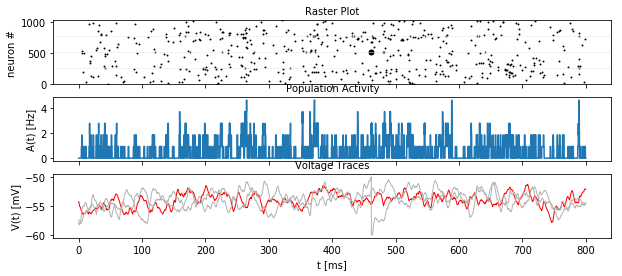

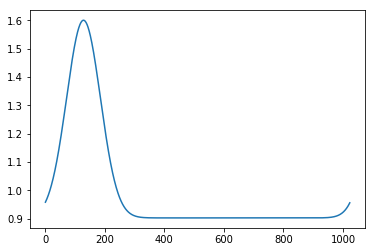

In [13]:
#Question 9:
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=1.6)

plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)

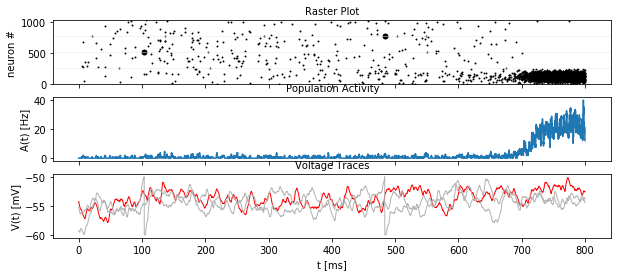

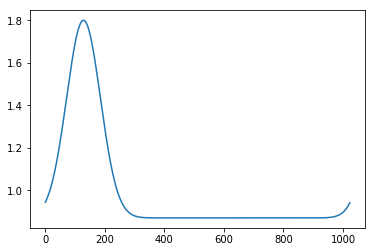

In [16]:
## Question 10: 
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_55 = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=1.8)

plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_55)
#the shape of the weight profile does not change, but the amplitude is bigger (it takes the value of Jpos_excit2excit)

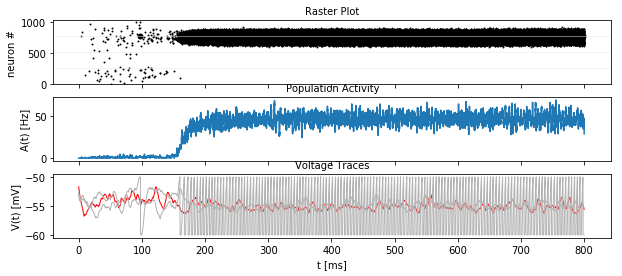

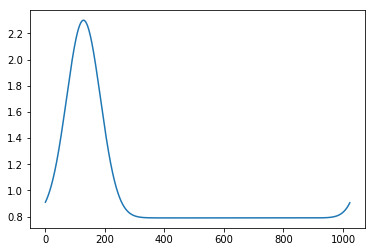

In [18]:
##Question 11:
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_55 = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=20.,
                                      Jpos_excit2excit=2.3)

plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_55)

#we notice that the population activity is close to 0 Hz before 150 ms, and then it increases suddenly to about 550Hz. Only the neurons around 
# #750 fire. In total, the presynaptic neurons seem to fire continuously, as the gray voltage traces appear,
# and the postsynaptic neuron stays at a more stable potential than before (around -55mV).

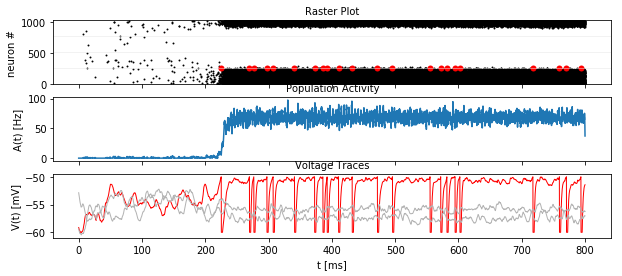

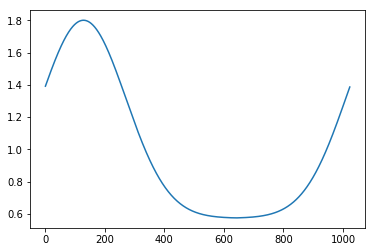

In [20]:
#Question 12
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_55 = wm_model.simulate_wm(sim_time=800. * b2.ms,
                                      poisson_firing_rate=1.3 * b2.Hz,
                                      sigma_weight_profile=50.,
                                      Jpos_excit2excit=1.8)

plot_tools.plot_network_activity(rate_monitor_excit,
                                 spike_monitor_excit,
                                 voltage_monitor_excit,
                                 t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_55)
#by decreasing sigma_weight_profile to 10, we observe that the weight profile is more steep as it is more tight, and also we no 
#longer observe the increase for neurons around #1000. On the contrary, increasing this parameter to 50 makes it larger, giving a 
#bigger importance to more neurons. 

12.   How does the weight profile change with the parameter `sigma_weight_profile`? How does the bump change with this parameter?

## Exercise 2 - Network Response to a Structured Input Stimulus

We now apply a stimulus to a subset of the excitatory population. The network has the property of integrating input over time and keep a memory of the input stimulus. Using the following code, you can run a simulation with a weak input stimulus.

```Python
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt

rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_45 = wm_model.simulate_wm(stimulus_center_deg=120,
                                         stimulus_width_deg=30,
                                         stimulus_strength=.06 * b2.namp,
                                         t_stimulus_start=100 * b2.ms,
                                         t_stimulus_duration=200 * b2.ms,
                                         sim_time=500. * b2.ms)



fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit,
                                                                       spike_monitor_excit,
                                                                       voltage_monitor_excit,
                                                                       t_min=0. * b2.ms)
plt.show()
```

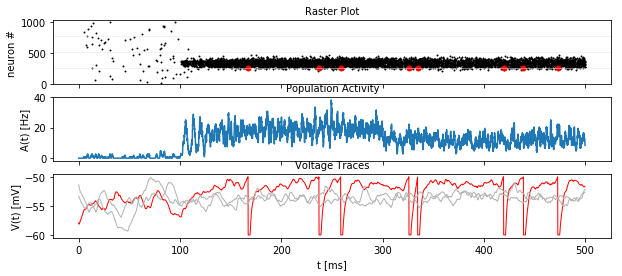

In [25]:
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_45 = wm_model.simulate_wm(stimulus_center_deg=120,
                                         stimulus_width_deg=30,
                                         stimulus_strength=.5 * b2.namp,
                                         t_stimulus_start=100 * b2.ms,
                                         t_stimulus_duration=200 * b2.ms,
                                         sim_time=500. * b2.ms)



fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit,
                                                                       spike_monitor_excit,
                                                                       voltage_monitor_excit,
                                                                       t_min=0. * b2.ms)
plt.show()

**Integration of input.**

Run the stimulation given above. Then answer the following questions qualitatively (by eye, from the raster plot).

1.   At which time can you identify a change in the population activity? How does that compare to the time when the stimulus is applied?
2.   What is the population activity at the end of the simulation?
3.   For the time point t=400ms, sketch the firing rate across the population (neuron index on the x-axis, per-neuron firing rate on the y-axis).
4.   Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?
5.   Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?

In [ ]:
##Question 1: the population activity changes from t=200ms. The stimulus starts at t=100 ms and lasts for 200 ms. We can assume
#that it takes 100 ms for the stimulus to affect the postsynaptic neuron.

##Question 2: at the end of the stimulation, only the neurons around neuron #300 fire. Selectivity for direction

**Role of the inhibitory population.**

We can remove the inhibitory population by setting its size to the minimal size N_inhibitory = 1. If we also deactivate the external input we can study the effect of the recurrent weights within the excitatory population:

Parameters: 

```Python 
N_inhibitory = 1
stimulus_strength = 0.65 * b2.namp
t_stimulus_start = 5 * b2.ms
t_stimulus_duration = 25 * b2.ms
sim_time = 80. * b2.ms
```

6.   Before running the simulation: What do you expect to see?
7.   Run the simulation with the given parameters. Describe your observations.

Now run again a "normal" simulation:

```Python
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_45 = wm_model.simulate_wm(stimulus_center_deg=120,
                                         stimulus_width_deg=30,
                                         stimulus_strength=.06 * b2.namp,
                                         t_stimulus_start=100 * b2.ms,
                                         t_stimulus_duration=200 * b2.ms,
                                         sim_time=500. * b2.ms)
```

8.   As for the excitatory population, plot the raster, population activity and voltage traces for the inhibitory population.
9.   What is the role of the inhibitory population?


## Exercise 3 - Decoding the Population Activity into a Population Vector

In the raster plot above we see that the population of spiking neurons keeps a memory of the stimulus. In this exercise we decode the population vector (i.e. the angle `theta` stored in the working memory) from the spiking activity. The population vector is defined as the **weighted (by spike counts) mean of the preferred directions of the neurons**. We access the data in the Brian2 **SpikeMonitor** returned by the simulation to calculate the population vector. Read the [Brian2 documentation](http://brian2.readthedocs.io/en/stable/user/recording.html) to see how one can access spike trains. Then implement the readout following the steps given here:

**Mapping the neuron index onto its preferred direction.**

1. Write a function **get\_orientation(idx\_list, N)** which maps a vector of neuron indices `idx_list` onto a vector of preferred directions. `idx_list` is the subset of `k` monitored neurons. The second parameter `N` is the total number of neurons in the excitatory population. Verify your implementation by calling the function with the following example input:

``` Python
> get_orientation([0, 1, 5, 10], 11)
> [16.36, 49.09, 180.0, 343.64]
>
> get_orientation([0, 1, 499, 500, 999], 1000)
> [0.18, 0.54, 179.82, 180.18, 359.82]
```


In [15]:
def get_orientation(indx_list,N):
    angle=360/N
    orientation=[]
    for k in range (len(indx_list)):
        orientation.append(angle*(indx_list[k]+1/2))
    return orientation

In [19]:
get_orientation([0, 1, 5, 10], 11)
get_orientation([0, 1, 499, 500, 999], 1000)

[0.18, 0.54, 179.82, 180.18, 359.82]

**Extracting spikes from the spike monitor.**

The population vector `theta` changes over time due to drift and diffusion which is why we are interested in `theta(t)`. As we are dealing with spikes (discrete point events), and a small number of neurons, we have to average the population activity over some time window around $t$, 
$[t_\text{min}=t - t_\text{window-width}/2\,,\,t_\text{max} =t + t_\text{window-width}/2]$, to get an estimate of `theta(t)`.

2. Write a function `get_spike_count(spike_monitor, spike_index_list, t_min, t_max)` which returns an array of spike counts (one value for each neuron in `spike_index_list`). Be careful about the indexing: `spike_index_list` is a list of `k` neuron indices in [0, N-1] while the returned array `spike_count_list` is of length `k`.

The parameter `spike_monitor` is the spike_monitor_excit returned by the function simulate_wm. The following pseudo-code and fragments are useful to implement `get_spike_count`:

```Python
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    nr_neurons = len(spike_index_list)
    spike_count_list = numpy.zeros(nr_neurons)
    spike_trains = spike_monitor.spike_trains()
    # ...
    # loop over the list of neurons and get the spikes within the time window:
        (spike_trains[i]>=t_min) & (spike_trains[i]<(t_max))  # try sum(list of booleans)
    # ...
    return spike_count_list
```

In [30]:
def get_spike_count(spike_monitor,spike_index_list,t_min,t_max):
    nr_neurons=len(spike_index_list)
    spike_count_list=np.zeros(nr_neurons)
    spike_trains=spike_monitor.spike_trains()
    for i in range (len(spike_trains)):
        reduced_train=((spike_trains[i]>=t_min) & (spike_trains[i]<(t_max)))
        spike_count_list[i]=sum(reduced_train)
    return spike_count_list

3. Do a plausibility check of your implementation: In one of the previous questions you have sketched the firing rates across the population at t=400ms. Use `get_spike_count` to plot the profile. Compare to your sketch. You can use the following code block. It's assumed you have run a simulation and the two variables `spike_monitor_excit` and `idx_monitored_neurons_excit` are defined. Then play with the `t_window` parameter to get an intuition for 'good' values.

```Python
import matplotlib.pyplot as plt

t = 400*b2.ms  # time point of interest
t_window = 10*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")
```

100. Hz^2


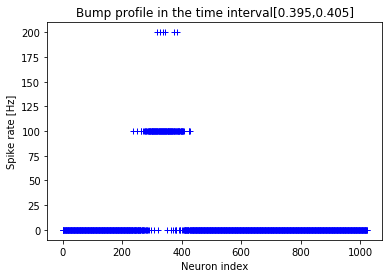

In [47]:
import matplotlib.pyplot as plt

t = 400*b2.ms  # time point of interest
t_window = 10*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, "+b",)
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")
#print(spike_rates[398])

**Computing the population vector.**

4.   Combine the two previous functions to calculate theta(t). For our purpose, it is sufficient to calculate a weighted mean of preferred directions. It is not necessary to correctly decode an angle close to 0deg = 360deg (You can stimulate the network at 350deg to see the problem).

In [54]:
def theta(t,window):
    t_min=t-window/2
    t_max=t+window/2
    spike_counts=get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min,t_max)
    spike_rates = spike_counts/(t_max-t_min)/b2.second
    max_rate=max(spike_rates)
    preferred_neurons=[]
    neuron_weight=[]
    for k in range (len(spike_rates)):
        if spike_rates[k]>0:
            preferred_neurons.append(k)
            neuron_weight.append(spike_rates/max_rate)
    orientation=get_orientation(preferred_neurons,len(spike_rates))
    for k in range (len(orientation)):
        orientation[k]=orientation[k]*neuron_weight[k]
    theta=sum(orientation)
    return theta

5.   Run a simulation and decode the population vector at the time when the **stimulation** ends. You should get a value close to the stimulus location.

In [55]:
rate_monitor_excit,\
spike_monitor_excit,\
voltage_monitor_excit,\
idx_monitored_neurons_excit,\
rate_monitor_inhib,\
spike_monitor_inhib,\
voltage_monitor_inhib,\
idx_monitored_neurons_inhib,\
weight_profile_45 = wm_model.simulate_wm(stimulus_center_deg=120,
                                         stimulus_width_deg=30,
                                         stimulus_strength=.5 * b2.namp,
                                         t_stimulus_start=100 * b2.ms,
                                         t_stimulus_duration=200 * b2.ms,
                                         sim_time=500. * b2.ms)



#fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit,
 #                                                                      spike_monitor_excit,
  #                                                                     voltage_monitor_excit,
   #                                                                    t_min=0. * b2.ms)
#plt.show()
t=300*b2.ms
t_window = 10*b2.ms # width of the window over which the average is taken
theta(t,t_window)

array([0., 0., 0., ..., 0., 0., 0.])

6.   Pack the calculation of theta(t) into a function `get_theta_time_series` which takes an additional parameter `t_snapshots` (an array of time points at which you want to decode the population vector). `get_theta_time_series` loops over all `t_snapshots` and calls `get_spike_count`. Use your function to readout and visualize the evolution of theta. You can take some inspiration from the following code fragment:

```Python
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor, idx_monitored_neurons, t_snapshots, t_window_width)

# plot theta vs time using pyplot
import matplotlib.pyplot as plt
plt.plot(t_snapshots/b2.ms, theta_ts)
```

## Exercise 4 - Visualize the Diffusion of the Population Vector

As mentioned above, the population vector changes over time due to drift and diffusion. In our implementation, because of homogeneous network properties (equal parameters, equal weights, shared presynaptic neurons) the drift is zero.

Use your functions developed in the previous questions to study the diffusion of the population vector:

1.   Simulate a network of size `N_excitatory = 512`. Apply a stimulus from `t=50ms` to `t=200ms`. Plot theta(t). *Note that when you decrease the size of the excitatory population you also have to decrease the inhibitory population and the weights (`N_inhibitory` and `weight_scaling_factor`). When dividing the number of presynaptic neurons in half, you have to double the weights to keep the total synaptic input the same.*
2.   Repeat the simulation at least 3 times. Plot each time series theta(t) into the same figure.
3.   Change the size of the network to `N_excitatory = 1024` and redo the previous steps.
4.   What do you observe?


<img src=https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/WorkingMemory_PopulationVector2048.png width="500">

<i><center>Diffusion of the population vector for three different simulations.</center></i>

## Exercise 5 - Slow and Fast Channels

The working memory circuit we study in this exercise combines three different receptors: NMDA and AMPA at excitatory synapses, and GABA at inhibitory synapses. A crucial element for this circuit is the slow dynamics of the NMDA receptor. 

1. Read the chapters [3.1 Synapses](http://neuronaldynamics.epfl.ch/online/Ch3.S1.html) and look at Figure 3.2 to understand the dynamics of the receptors.
2. The dynamics of the NMDA receptor are implemented in the function `simulate_wm`. Look for the equations `excit_lif_dynamics` in the source code. In the model used here, what is the timescale (in milliseconds) of the fast rise? What is the timescale of the slow decay?